Lyrical Sentiment Analysis

In [2]:
!pip install gensim
!pip install nltk

In [3]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer, WordNetLemmatizer

import re

# Word2vec
from gensim.models import Word2Vec
import string

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /Users/sa26/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sa26/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sa26/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Load csv file
df = pd.read_csv('/Users/sa26/Documents/GitHub/Music-Recommendation-Algorithm/data/raw/train.csv')

In [5]:
lyrics = df['lyrics']
lyrics.head()

0    hold time feel break feel untrue convince spea...
1    believe drop rain fall grow believe darkest ni...
2    sweetheart send letter goodbye secret feel bet...
3    kiss lips want stroll charm mambo chacha merin...
4    till darling till matter know till dream live ...
Name: lyrics, dtype: object

In [11]:
pattern = re.compile(r'\bhate\b', re.IGNORECASE)

matching_rows = [row for row in lyrics if pattern.search(row)]

In [12]:
pattern = re.compile(r'\blove\b', re.IGNORECASE)

love_rows = [row for row in lyrics if pattern.search(row)]

More love than hate!

In [8]:
# Create a word2vec model

w2v_toy = Word2Vec(sentences=lyrics)

In [9]:
# train the word2vec model

w2v_toy.train(lyrics, total_examples=len(lyrics), epochs=10)

(21436587, 126755060)

In [10]:
# word2vec removes infrequently used words, so unfortunately it only "learned" the meaning of a few words

w2v_toy.wv.key_to_index

{' ': 0,
 'e': 1,
 'a': 2,
 'o': 3,
 'i': 4,
 't': 5,
 'r': 6,
 'n': 7,
 'l': 8,
 's': 9,
 'h': 10,
 'd': 11,
 'c': 12,
 'g': 13,
 'm': 14,
 'u': 15,
 'y': 16,
 'k': 17,
 'w': 18,
 'b': 19,
 'p': 20,
 'f': 21,
 'v': 22,
 'z': 23,
 'j': 24,
 'x': 25,
 'q': 26,
 'é': 27,
 'í': 28,
 'ó': 29,
 'á': 30,
 'ñ': 31,
 'â': 32,
 'ا': 33,
 'ö': 34,
 'è': 35,
 'ي': 36,
 '지': 37,
 '어': 38,
 '我': 39,
 'و': 40,
 'ل': 41,
 'ä': 42,
 'の': 43,
 '抰': 44,
 'い': 45,
 'à': 46,
 '이': 47,
 '에': 48,
 '아': 49,
 'ê': 50,
 'م': 51,
 '리': 52,
 '你': 53,
 '면': 54,
 '的': 55,
 '가': 56,
 'ī': 57,
 'ら': 58,
 'ü': 59,
 'ك': 60,
 '서': 61,
 '버': 62,
 '마': 63,
 'る': 64,
 'も': 65,
 '다': 66,
 'å': 67,
 'な': 68,
 '들': 69,
 '해': 70,
 'ʼ': 71,
 'س': 72,
 '러': 73,
 'ب': 74,
 'か': 75,
 'ë': 76,
 '라': 77,
 'î': 78,
 'ر': 79,
 'ت': 80,
 'ï': 81,
 'ن': 82,
 '길': 83,
 '는': 84,
 'に': 85,
 '有': 86,
 '하': 87,
 'た': 88,
 '만': 89,
 'ま': 90,
 'で': 91,
 '나': 92,
 '스': 93,
 'د': 94,
 'ع': 95,
 'ف': 96,
 'し': 97,
 '대': 98,
 'を': 99,
 '잊': 100,

different languages

In [11]:
# let's contextualize this! What are the most similar words to "e"

w2v_toy.wv.most_similar("e")[0]

('v', 0.5982754826545715)

In [12]:
# get a sample of 5 random lyrics

lyrics.sample(5)

2355     night wind know gust liar steam blow stoke rea...
26683    whoa whoa jetlagged time miss home feel wait p...
2537     beautiful little toy eye see world years tear ...
10782    want kingpin live pekin want bigwig live pekin...
26696    stop need help fuck truth cause think mix pill...
Name: lyrics, dtype: object

In [13]:
# create a train,test split

df_train, df_test = train_test_split(lyrics, test_size=0.2, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 22689
TEST size: 5673


In [14]:
# tokenize your data

sentences = [t.split() for t in df_train] 

In [15]:
sentences

[['right',
  'wrong',
  'go',
  'blame',
  'lie',
  'cry',
  'die',
  'inside',
  'step',
  'step',
  'night',
  'night',
  'walk',
  'floor',
  'morning',
  'light',
  'leave',
  'word',
  'haunt',
  'mind',
  'fool',
  'goodbye',
  'time',
  'time',
  'warn',
  'sign',
  'beat',
  'heart',
  'keep',
  'tell',
  'hurt',
  'know',
  'cause',
  'leave'],
 ['white',
  'fairweather',
  'dream',
  'look',
  'different',
  'eye',
  'space',
  'time',
  'survive',
  'change',
  'time',
  'take',
  'life',
  'burn',
  'hearts',
  'afire',
  'desire',
  'change',
  'spirit',
  'world',
  'alive',
  'spirit',
  'world',
  'overdrive',
  'step',
  'dance',
  'step',
  'dance',
  'life',
  'ride',
  'rhythm',
  'spirit',
  'rise',
  'believe',
  'feel',
  'live',
  'future',
  'dream',
  'open',
  'eye',
  'technology',
  'direction',
  'spirit',
  'world',
  'alive',
  'spirit',
  'world',
  'overdrive',
  'step',
  'dance',
  'step',
  'dance',
  'life',
  'ride',
  'rhythm',
  'spirit',
  'ris

In [16]:
# create a word2vec model

w2v_model = Word2Vec()
w2v_model.build_vocab(sentences)

In [17]:
# take a look at the INITIAL vocab words that it discovered

w2v_model.wv.key_to_index

{'know': 0,
 'like': 1,
 'time': 2,
 'come': 3,
 'feel': 4,
 'heart': 5,
 'go': 6,
 'yeah': 7,
 'away': 8,
 'life': 9,
 'want': 10,
 'cause': 11,
 'baby': 12,
 'right': 13,
 'leave': 14,
 'live': 15,
 'tell': 16,
 'night': 17,
 'think': 18,
 'world': 19,
 'need': 20,
 'gonna': 21,
 'long': 22,
 'look': 23,
 'good': 24,
 'break': 25,
 'hold': 26,
 'hear': 27,
 'fall': 28,
 'mind': 29,
 'dream': 30,
 'say': 31,
 'hand': 32,
 'wanna': 33,
 'home': 34,
 'eye': 35,
 'little': 36,
 'better': 37,
 'play': 38,
 'lose': 39,
 'walk': 40,
 'fuck': 41,
 'believe': 42,
 'girl': 43,
 'stay': 44,
 'stand': 45,
 'turn': 46,
 'change': 47,
 'head': 48,
 'sing': 49,
 'things': 50,
 'take': 51,
 'start': 52,
 'face': 53,
 'blue': 54,
 'tear': 55,
 'money': 56,
 'tonight': 57,
 'inside': 58,
 'place': 59,
 'people': 60,
 'light': 61,
 'bring': 62,
 'song': 63,
 'shit': 64,
 'word': 65,
 'love': 66,
 'sweet': 67,
 'hard': 68,
 'true': 69,
 'stop': 70,
 'black': 71,
 'gotta': 72,
 'remember': 73,
 'give': 7

In [18]:
# let's train our mdoel

w2v_model.train(sentences, total_examples=len(sentences), epochs=10)

(14078796, 16542910)

In [19]:
# let's take a look at the vector we trained for the word 'bounce'

w2v_model.wv["bounce"]

array([-0.5633445 ,  1.0798497 , -0.14271078,  0.15196961, -1.4785719 ,
        0.67630917,  0.18980585,  0.87307274, -0.95308065, -1.2930061 ,
       -0.31425914,  0.75039274, -0.39956963,  1.7629769 ,  1.66318   ,
        0.25814292, -0.93306214,  0.85883975, -0.06890547, -0.5687195 ,
        0.17939694, -0.967184  ,  1.0833447 , -0.34372562, -1.5379313 ,
        0.37897027,  0.51934695, -0.02328895,  0.27138737,  1.6929384 ,
       -0.29937598, -0.7015989 ,  0.72273386, -1.6281992 ,  0.5409322 ,
       -1.0348313 ,  0.16407637,  0.23745586, -1.1909913 ,  0.33852583,
       -0.3553375 ,  0.20283763, -1.0000118 ,  0.8410868 ,  0.48091948,
       -0.81304413,  0.45991275,  0.08003609,  0.309364  ,  1.6003381 ,
        0.97564095,  0.08863744,  1.0513475 , -2.1123898 , -0.22847743,
        0.10915267,  0.73045456, -0.4742078 , -0.7462886 ,  0.5427751 ,
        0.8662222 ,  0.31991515, -0.98044103, -0.8445008 ,  0.47296286,
       -1.3221186 ,  0.5676062 , -0.70125866,  0.02608058,  1.17

In [20]:
# as we've established already, this does not give us too much info, let's take a look at the MOST similair words

w2v_model.wv.most_similar("bounce")

[('bouncin', 0.616563081741333),
 ('snap', 0.6106336116790771),
 ('jumpin', 0.5940732359886169),
 ('jersey', 0.5924526453018188),
 ('bouncy', 0.5867371559143066),
 ('twang', 0.5637973546981812),
 ('choppin', 0.5569058060646057),
 ('thong', 0.5566334128379822),
 ('fellas', 0.5519645810127258),
 ('wiggle', 0.5509955286979675)]

In [28]:
# finally, let's apply some PCA to each word in our model in order to reduce these values into a comprehensible visualization

words = list(w2v_model.wv.key_to_index.keys())
word_vectors = [w2v_model.wv[word] for word in words]

word_vectors

[array([ 1.98604822e-01, -2.09070012e-01,  1.53426036e-01, -1.02489173e+00,
         4.69877660e-01, -4.83233929e-01,  1.98427007e-01,  1.22369640e-01,
        -7.14246809e-01, -5.36343336e-01,  4.93547738e-01,  9.13733542e-02,
        -4.78052914e-01,  1.01662385e+00,  2.53161937e-01,  7.36119449e-01,
         5.33766866e-01,  1.04416370e+00, -1.23597336e+00, -7.40880072e-01,
        -4.90483761e-01,  9.02788597e-04, -6.47394836e-01, -2.85572894e-02,
         2.31319949e-01,  3.21533233e-01, -8.97248909e-02,  2.35532984e-01,
         2.21423611e-01,  2.06034213e-01, -2.19585389e-01,  4.30666775e-01,
        -3.84709001e-01,  7.10588396e-02, -8.99210274e-01, -1.44189525e+00,
         6.74903169e-02, -5.88213623e-01, -8.50647315e-02, -6.22024238e-01,
        -1.31998643e-01,  2.99520314e-01, -3.89303982e-01, -2.60754943e-01,
        -1.32437691e-01, -7.06040263e-01,  3.19737971e-01, -1.04398824e-01,
        -3.77331138e-01, -1.03785014e+00, -1.53238392e+00, -2.16666147e-01,
         7.5

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51082 (\N{HANGUL SYLLABLE IJ}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

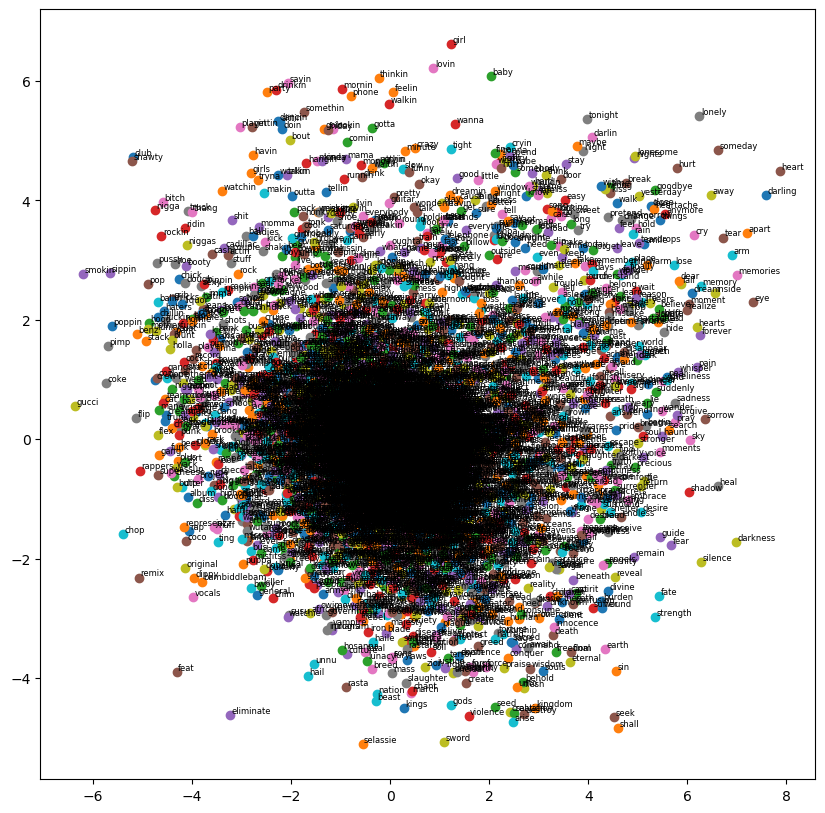

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(pca_vectors[i, 0], pca_vectors[i, 1])
    plt.text(pca_vectors[i, 0]+0.03, pca_vectors[i, 1]+0.03, word, fontsize=6)
plt.show()

13,192 words. Isolated words like "feat" highlight outliers in the dataset.

In [ ]:
pca_vectors